In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#WHOLE NY
data  = pd.read_csv("yellow_tripdata_2018-01.csv", usecols= ['tpep_pickup_datetime', 'payment_type','tpep_dropoff_datetime', 'PULocationID', 'trip_distance'])
#clean data
data = data.drop(data[(data.trip_distance <= 0) | (data.tpep_dropoff_datetime == data.tpep_pickup_datetime)].index)


In [147]:
#counting transactions per payment type
ex = data.groupby('payment_type').count()
ex = ex.rename(index={1: 'Credit_card', 2: 'Cash', 3: 'No_charge', 4:'Dispute'}, columns = {'trip_distance' : 'transactions'}).loc[:, ['transactions']]

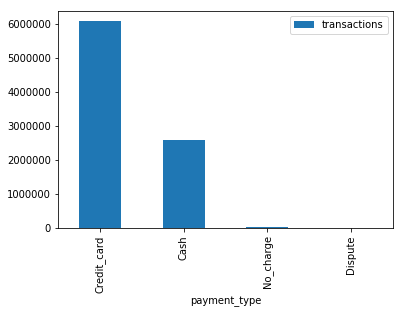

In [153]:
ex.plot(kind = 'bar')


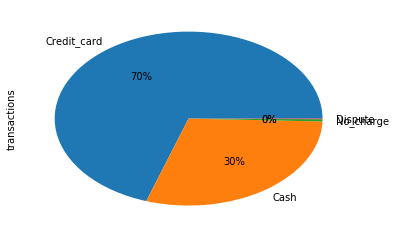

In [154]:
ex['transactions'].plot.pie(autopct='%1.0f%%')

In [7]:
#BOROUGH

In [ ]:
data2 = pd.read_csv("taxi _zone_lookup.csv")
borough = data.join(data2.set_index('LocationID'), on='PULocationID')

In [156]:
#storing probabilities for each payment type in each Borough

p1 = {}
p2 = {}
p3 = {}
p4 = {}
p5 = {}
p6 = {}
b = ['Manhattan', 'Queens', 'EWR', 'Bronx', 'Staten Island', 'Brooklyn', 'Unknown']
for i in b:
    bor = borough[borough.Borough == i]
    p1[i] = bor[bor.payment_type == 1].payment_type.count() / bor.index.size
    p2[i] = bor[bor.payment_type == 2].payment_type.count() / bor.index.size
    p3[i] = bor[bor.payment_type == 3].payment_type.count() / bor.index.size
    p4[i] = bor[bor.payment_type == 4].payment_type.count() / bor.index.size
    p5[i] = bor[bor.payment_type == 5].payment_type.count() / bor.index.size
    p6[i] = bor[bor.payment_type == 6].payment_type.count() / bor.index.size

Manhattan
Queens
EWR
Bronx
Staten Island
Brooklyn
Unknown


In [157]:
#From dictionaries to Dataframes

my1 = pd.DataFrame.from_dict(p1, orient='index', dtype=None, columns=['Credit_card'])
my2 = pd.DataFrame.from_dict(p2, orient='index', dtype=None, columns=['Cash'])
my3 = pd.DataFrame.from_dict(p3, orient='index', dtype=None, columns=['No_charge'])
my4 = pd.DataFrame.from_dict(p4, orient='index', dtype=None, columns=['Dispute'])
my5 = pd.DataFrame.from_dict(p5, orient='index', dtype=None, columns=['Unknown'])
my6 = pd.DataFrame.from_dict(p6, orient='index', dtype=None, columns=['Voided trip'])

In [158]:
#Merging the probabilities

result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
my5 = my5.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my5)
my6 = my6.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my6)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})


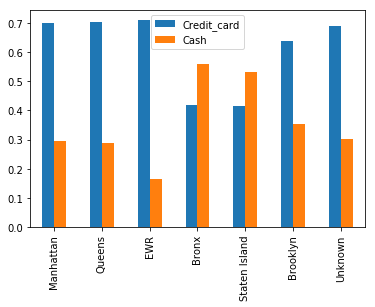

In [159]:
result.plot.bar(y = ['Credit_card', 'Cash'])


In [319]:
# CHI SQUARED 

#storing number of transactions for each payment type in each Borough
p1 = {}
p2 = {}
p3 = {}
p4 = {}
p5 = {}
p6 = {}
b = ['Manhattan', 'Queens', 'EWR', 'Bronx', 'Staten Island', 'Brooklyn', 'Unknown']

for i in b:
    bor = borough[borough.Borough == i]
    p1[i] = bor[bor.payment_type == 1].payment_type.count()
    p2[i] = bor[bor.payment_type == 2].payment_type.count() 
    p3[i] = bor[bor.payment_type == 3].payment_type.count() 
    p4[i] = bor[bor.payment_type == 4].payment_type.count() 
    p5[i] = bor[bor.payment_type == 5].payment_type.count() 
    p6[i] = bor[bor.payment_type == 6].payment_type.count() 
    
my1 = pd.DataFrame.from_dict(p1, orient='index', dtype=None, columns=['Credit_card'])
my2 = pd.DataFrame.from_dict(p2, orient='index', dtype=None, columns=['Cash'])
my3 = pd.DataFrame.from_dict(p3, orient='index', dtype=None, columns=['No_charge'])
my4 = pd.DataFrame.from_dict(p4, orient='index', dtype=None, columns=['Dispute'])
my5 = pd.DataFrame.from_dict(p5, orient='index', dtype=None, columns=['Unknown'])
my6 = pd.DataFrame.from_dict(p6, orient='index', dtype=None, columns=['Voided trip'])

result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
my5 = my5.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my5)
my6 = my6.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my6)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})


In [320]:
chi = result.loc[:, ['Credit_card', 'Cash']]
chi

,Credit_card,Cash
Manhattan,5552961,2343021
Queens,361551,148661
EWR,129,30
Bronx,2793,3719
Staten Island,46,59
Brooklyn,62654,34623
Unknown,102469,44868


In [321]:
chi_cc = chi.Credit_card.sum()
chi_ca = chi.Cash.sum()
chi_total = manhattan_chi_cc + manhattan_chi_ca
chi_rows = chi.sum(axis=1)

In [338]:
# H_0 = 'The Boroughs and payment type are not correlated'
# H_1 = 'The Boroughs and payment type are correlated'


chi_value = 0
for i in range(7):
    expected_freq = (chi_rows[i] * manhattan_chi_cc) / manhattan_chi_total
    chi_value = chi_value + (expected_freq - chi.Credit_card[i])**2 / expected_freq   
    print(chi_value)
    expected_freq = (chi_rows[i] * manhattan_chi_ca) / manhattan_chi_total
    chi_value = chi_value + (expected_freq - chi.Cash[i])**2 / expected_freq
    print(chi_value)

chi_value

5.335752477623734
17.93983150875117
44.554559818334766
107.42369409934695
110.09995309452435
116.42179430144708
810.6314751243235
2450.4889681319496
2460.9429509315246
2485.637279603714
2959.4235323162293
4078.598268793084
4089.1741091548142
4114.156288950229


4114.156288950229

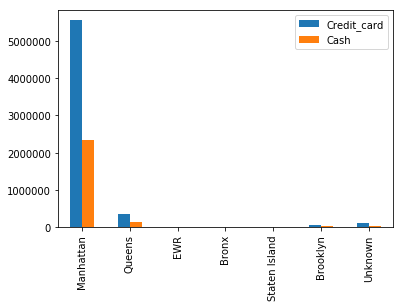

In [337]:
chi.plot.bar()

In [344]:
chi_value / 6
chi_value
# P(chi > 4114.156288950229) = 0.00000   -> the initial assumption is rejected
# They are correlated

4114.156288950229